# Import Data

In [1]:
!pip install pandas scikit-learn xgboost dill
!pip install xgboost


You should consider upgrading via the 'C:\Users\chels\OneDrive\Desktop\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\chels\OneDrive\Desktop\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('regressiondata.csv', index_col='ID')

In [4]:
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [5]:
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [6]:
#to get a specific roll 
df.iloc[9351]

TransactionDate        2019.07
HouseAge                  36.0
DistanceToStation    554.32482
NumberOfPubs               3.0
PostCode                5217.0
HousePrice              420246
Name: 9351, dtype: object

# Splitting the Data

In [7]:
#Import dependecies
from sklearn.model_selection import train_test_split


In [8]:
#split data to training and testing
train,test = train_test_split(df, test_size = 0.3, random_state=1234)

In [9]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# Exploratory Data Analysis

In [10]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [11]:
# get infor abt data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


In [12]:
# create summary statistics
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [13]:
#Type cast incorrect datatypes to new datatypes
train['PostCode'] = train['PostCode'].astype(str)
train['TransactionDate'] = train['TransactionDate'].astype(str)


In [14]:
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


# Analyse Numerical Attributes

## Plot Distributions

In [15]:
# import  libraries to  plot data
!pip install matplotlib seaborn

You should consider upgrading via the 'C:\Users\chels\OneDrive\Desktop\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.


In [16]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\users\chels\onedrive\desktop\full stack machine learning\fullstack\lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [17]:
#Import dependencies
from matplotlib import pyplot as plt
import seaborn as sns

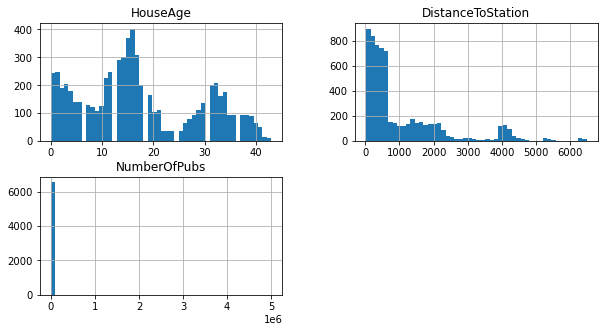

In [18]:
#plot distributions
train.hist(figsize =(10,5), bins = 50)
plt.show()

## Why isnt House Price showing up as Numeric?

In [19]:
# train['HousePrice'] = train['HousePrice'].astype(float) ValueError: could not convert string to float: '??'


In [20]:
# filter dataset based on HousePrice  == ??
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [21]:
#Drop row that '??'
train=train[train['HousePrice'] !='??']

In [22]:

train['HousePrice'] = train['HousePrice'].astype(float)


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6548 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   object 
 1   HouseAge           6545 non-null   float64
 2   DistanceToStation  6546 non-null   float64
 3   NumberOfPubs       6546 non-null   float64
 4   PostCode           6548 non-null   object 
 5   HousePrice         6543 non-null   float64
dtypes: float64(4), object(2)
memory usage: 358.1+ KB


<AxesSubplot:title={'center':'Box Plot For House Price'}, xlabel='HousePrice'>

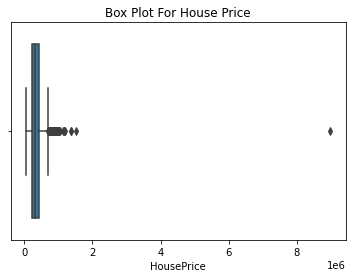

In [24]:
#create a box plot for the house prices
plt.title('Box Plot For House Price')
sns.boxplot(x=train['HousePrice'])


## Drop Outlier


In [25]:
#Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [26]:
train = train.drop(8445)

In [27]:
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


# What is happening with our pubs

In [28]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [29]:
train.drop(13, inplace=True)

In [30]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
3195,2020.11,32.0,324.371247,10.0,5614.0,488918.0
2996,2020.03,28.0,772.777219,10.0,5217.0,299235.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


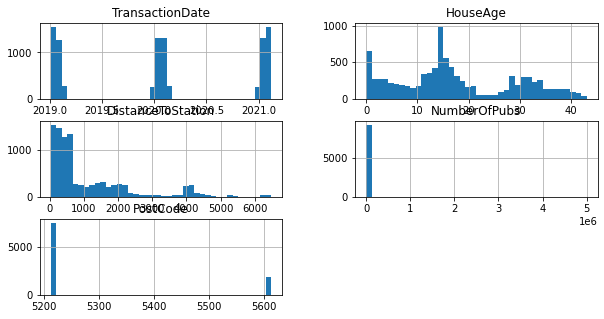

In [31]:
df.hist(figsize =(10,5), bins = 40)
plt.show()

## Analysing Categorical Features

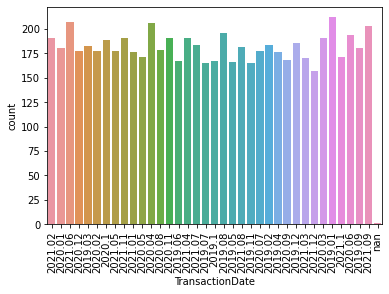

In [32]:
#create  a count plot transaction date
plt.xticks(rotation=90)
sns.countplot(x='TransactionDate', data = train)
plt.show()

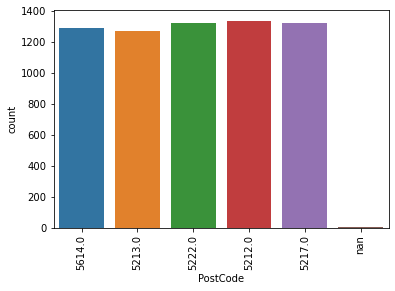

In [33]:
#create  a count plot transaction date
plt.xticks(rotation=90)
sns.countplot(x=train['PostCode'])
plt.show()

### Finding relationships between features using Pearsons Correlation

#### Analyze Relationships between Numeric/ Numeric

##### Calculate Pearson's Correlation

In [34]:
#Calculate Pearson's Correlation
train.select_dtypes(exclude ='object').corr()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
HouseAge,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.156693,-0.539859,0.452309,1.000000


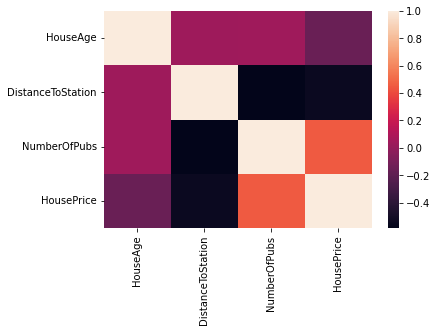

In [35]:
#viz correlation using a heat map
sns.heatmap(train.select_dtypes(exclude ='object').corr())
plt.show()

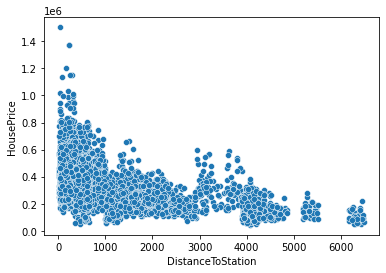

In [36]:
#created a scatter plot
sns.scatterplot(x= 'DistanceToStation' , y= 'HousePrice', data= train )
plt.show()

#### Analyze Relationships Categorical features/Numeric features

#### Is Post Code Driving Value?

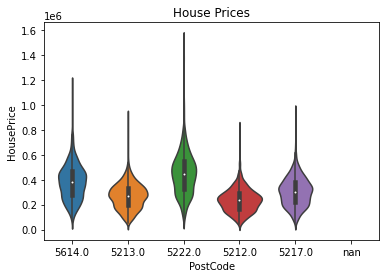

In [37]:
plt.title('House Prices')
sns.violinplot(x='PostCode', y= 'HousePrice', data=train)
plt.show()

##### what about the date it was sold

In [38]:
train[train['TransactionDate'] == 'nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


In [39]:
train =train[~train['HousePrice'].isnull()]

In [40]:
int(train.iloc[0]['TransactionDate'][:4])

2021

In [41]:
#apply string transformation on Transaction Date
train['YearSold'] = train['TransactionDate'].apply (lambda x: x[:4]).astype(int)
train['MonthSold'] = train['TransactionDate'].apply (lambda x: x[5:]).astype(int)

In [42]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice,YearSold,MonthSold
ID,,,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0,2021,2
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0,2020,1
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0,2021,6
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0,2020,12
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0,2019,3


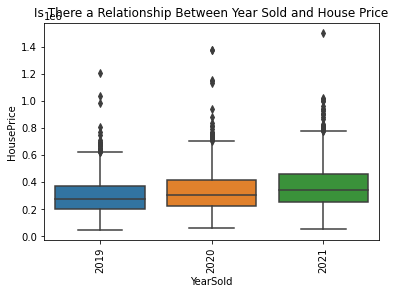

In [43]:
plt.title('Is There a Relationship Between Year Sold and House Price')
plt.xticks(rotation=90)
sns.boxplot(x='YearSold', y='HousePrice', data = train)
plt.show()

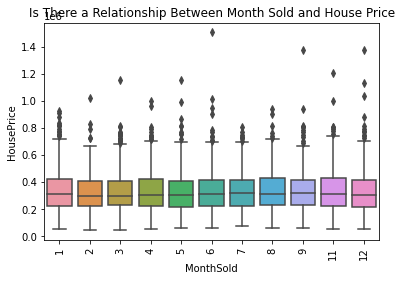

In [44]:
plt.title('Is There a Relationship Between Month Sold and House Price')
plt.xticks(rotation=90)
sns.boxplot(x='MonthSold', y='HousePrice', data = train)
plt.show()

# 4.0 Data Preprocessing

### Build Preprocessing Function

In [45]:
from sklearn.impute import  SimpleImputer  #for soulving missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.base import BaseEstimator, TransformerMixin

In [46]:
class Preprocessor (BaseEstimator, TransformerMixin):
    #train our custom preprocessor
    def fit(self, X, y = None):
        
        #create a fit imputer
        self.imputer = SimpleImputer()
        self.imputer.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        #create and fit Standard Scaler
        self.scaler = StandardScaler()
        self.scaler.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        #Create and fit OneHotEncoder
        self.onehot = OneHotEncoder(handle_unknown = 'ignore')
        self.onehot.fit(X[['PostCode']])
        
        return self
        
        
        
    # Apply our custom Preprocessor
    def transform(self,X):
             
        #Apply simple imputer
        imputed_cols =  self.imputer.transform(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        onehot_cols = self.onehot.transform(X[['PostCode']])
        
        
        # Copy the df
        transformed_df = X.copy()
        
        #Apply year and month transforms
        
        transformed_df['Year'] = transformed_df['TransactionDate'].apply(lambda x: x[:4]).astype(int)
        transformed_df['Month'] = transformed_df['TransactionDate'].apply(lambda x: x[5:]).astype(int)
        transformed_df = transformed_df.drop('TransactionDate', axis = 1)
                                                                         
        
        
        
        # Apply transformed columns
        
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = imputed_cols
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = self.scaler.transform(transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        #Drop Exisiting Post coloumn and replace with one hot equiv
        transformed_df = transformed_df.drop('PostCode', axis = 1)
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [47]:
preproc = Preprocessor()

In [48]:
preproc.fit(train)

Preprocessor()

In [49]:
preproc.transform(train.drop(['YearSold', 'MonthSold'],axis = 1))

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
664,1.710554,-0.564089,-1.039825,301492.0,2020,8,0,0,1,0,0
7540,1.449005,-0.769644,0.313432,174239.0,2020,8,1,0,0,0,0
7221,-0.120288,-0.382673,-0.701510,327666.0,2020,2,0,0,1,0,0


### Preview Preprocessed Data

In [50]:
preprocessed_df= preproc.transform(train)

In [51]:
preprocessed_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float64
YearSold               int32
MonthSold              int32
Year                   int32
Month                  int32
PostCode_5212.0        int32
PostCode_5213.0        int32
PostCode_5217.0        int32
PostCode_5222.0        int32
PostCode_5614.0        int32
dtype: object

In [52]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6541 entries, 8450 to 8915
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   YearSold           6541 non-null   int32  
 5   MonthSold          6541 non-null   int32  
 6   Year               6541 non-null   int32  
 7   Month              6541 non-null   int32  
 8   PostCode_5212.0    6541 non-null   int32  
 9   PostCode_5213.0    6541 non-null   int32  
 10  PostCode_5217.0    6541 non-null   int32  
 11  PostCode_5222.0    6541 non-null   int32  
 12  PostCode_5614.0    6541 non-null   int32  
dtypes: float64(4), int32(9)
memory usage: 485.5 KB


#### Clean Up Feature Analysis

In [53]:
train = train.drop(["YearSold", "MonthSold"], axis=1)

In [54]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


#### Create X and y values

In [55]:
X_train = train.drop('HousePrice', axis =1)
y_train = train['HousePrice']

## 5. Modelling

#### Import ML Dependencies

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

#### Create Pipelines

In [57]:
pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()),
    'rf' : make_pipeline(Preprocessor(), RandomForestRegressor()),
    'gb' : make_pipeline(Preprocessor(), GradientBoostingRegressor()),
    'xg' : make_pipeline(Preprocessor(), XGBRegressor()),
    
}


In [58]:
pipelines['xg']

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs

#### Create Tuning Grids

In [59]:
pipelines['ridge'].named_steps

{'preprocessor': Preprocessor(), 'ridge': Ridge()}

In [60]:
pipelines['xg'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'xgbregressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             

In [61]:
grid = {
    'ridge':{'ridge__alpha':[0.05,0.25,0.5,1.0]},
    'rf': {
        'randomforestregressor__n_estimators':[100,200,300],
        'randomforestregressor__max_depth': [5,6,7,None],
    },
    'gb':{
        'gradientboostingregressor__n_estimators': [100,200,300],
        'gradientboostingregressor__max_depth': [5,6,7,None]
    },
    'xg':{
        'xgbregressor__n_estimators': [100,200,300],
        'xgbregressor__max_depth':[5,6,7,None] 
    }
     
}

#### Train Models and Perform HPO

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(algo)
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv = 10, scoring='r2')
        model.fit(X_train, y_train)
        fit_models[algo] = model
        
    except Exception as e:
        print(f'Model{algo} had an error {e}')
        

ridge
rf
gb
xg


In [64]:
fit_models

{'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('ridge', Ridge())]),
              n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
              scoring='r2'),
 'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('randomforestregressor',
                                         RandomForestRegressor())]),
              n_jobs=-1,
              param_grid={'randomforestregressor__max_depth': [5, 6, 7, None],
                          'randomforestregressor__n_estimators': [100, 200,
                                                                  300]},
              scoring='r2'),
 'gb': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('gradientboostingregressor',
                                      

## 6. Evaluate Models

### Import Evaluation Metrics

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Preprocess Test Set for Prediction

##### Look for Nulls

In [66]:
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [67]:
# drop any nulls in the house price
test = test[~test.HousePrice.isnull()]

In [68]:
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

#### Check datatypes

In [69]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [70]:
#fix dtype in data frames
test = test[test['HousePrice'] !='??']
test['TransactionDate'] = test.TransactionDate.astype(str)
test['HousePrice'] = test['HousePrice'].astype(float)
test['PostCode'] = test['PostCode'].astype(str)

In [71]:
test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

##### Create X_test and y_test

In [72]:
X_test = test.drop('HousePrice', axis =1)
y_test = test['HousePrice']

#### Calculate Regression Metrics

In [73]:
X_test.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
7857,2021.11,0.0,267.000535,6.0,5222.0
1641,2021.04,12.0,500.080510,5.0,5212.0
3620,2019.07,14.0,4024.663391,0.0,5614.0
2820,2020.09,18.0,568.954185,4.0,5614.0
1572,2020.07,11.0,44.210016,1.0,5614.0


In [74]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    r2 = r2_score(y_test,yhat)
    mea =mean_absolute_error(y_test,yhat)
    print(f'{algo}- R2 Score:{r2}, MAE Score:{mea}')


ridge- R2 Score:0.6691443155811786, MAE Score:62578.08779739596
rf- R2 Score:0.8213978194756713, MAE Score:44476.823263170416
gb- R2 Score:0.8630551666782852, MAE Score:38660.10032939081
xg- R2 Score:0.853617617693814, MAE Score:39618.537530937836


#### Make Predictions

In [75]:
model = fit_models['gb']

In [76]:
yhat = model.predict(X_test)

In [77]:
results_df = y_test.to_frame()
results_df['yhat'] = yhat
results_df['delta'] = results_df.HousePrice.astype(float) - results_df.yhat

In [78]:
results_df.to_csv('results.csv')

#### Explain Model

#### Calculate Feature Importance

In [79]:
ensemble = model.best_estimator_['gradientboostingregressor']

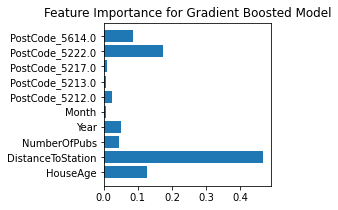

In [80]:
plt.figure(figsize=(3,3))
plt.title('Feature Importance for Gradient Boosted Model')
plt.barh(ensemble.feature_names_in_,ensemble.feature_importances_)
plt.show()

#### Calculate Features Importance for All Models

In [81]:
import numpy as np

In [82]:
feature_importances = {}
for algo, pipeline in fit_models.items():
    if algo == 'ridge':
        coef_  = pipeline.best_estimator_[1].coef_
        feature_importances[algo] = np.square(coef_) / np.sum(np.square(coef_))
        
    else:
        feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_

In [83]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13666203, 0.44587884, 0.05517793, 0.05106789, 0.03501672,
        0.00895855, 0.00266813, 0.01196718, 0.16630665, 0.08629609]),
 'gb': array([0.12743265, 0.46737597, 0.04544189, 0.05179942, 0.00624592,
        0.02393152, 0.00642992, 0.00961784, 0.17491878, 0.08680609]),
 'xg': array([0.03207528, 0.07127062, 0.02292063, 0.05411822, 0.00475283,
        0.09275293, 0.02268689, 0.04478648, 0.41193107, 0.24270506],
       dtype=float32)}

In [84]:
importance_df = pd.DataFrame(feature_importances, index = ensemble.feature_names_in_)
importance_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.136662,0.127433,0.032075
DistanceToStation,0.101874,0.445879,0.467376,0.071271
NumberOfPubs,0.031097,0.055178,0.045442,0.022921
Year,0.038686,0.051068,0.051799,0.054118
Month,0.000006,0.035017,0.006246,0.004753
PostCode_5212.0,0.225705,0.008959,0.023932,0.092753
PostCode_5213.0,0.094727,0.002668,0.006430,0.022687
PostCode_5217.0,0.016941,0.011967,0.009618,0.044786
PostCode_5222.0,0.392286,0.166307,0.174919,0.411931
PostCode_5614.0,0.082193,0.086296,0.086806,0.242705


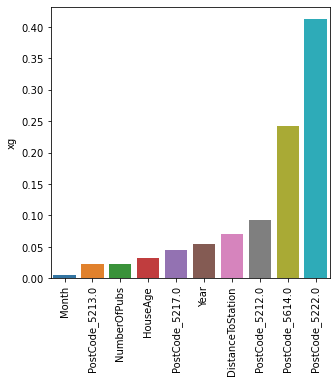

In [85]:
plt.figure(figsize = (5,5))
model_name = 'xg'
sorted_imp = importance_df.sort_values(model_name)
sns.barplot(x = sorted_imp.index, y= model_name, data= sorted_imp)
plt.xticks(rotation = 90)
plt.show()

#### Plot Trees

In [86]:
#Import dependencies  to help compare gb and xgboost
!pip install graphviz


You should consider upgrading via the 'C:\Users\chels\OneDrive\Desktop\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.


In [87]:
from sklearn.tree import plot_tree
import xgboost as xgb
from matplotlib.pylab import rcParams

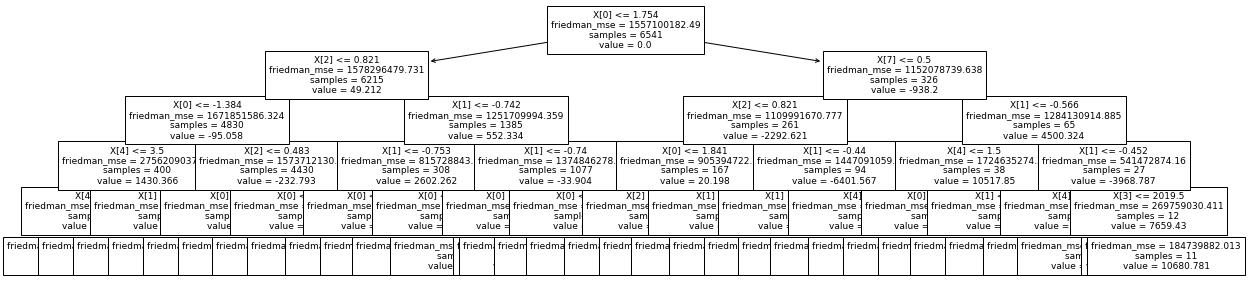

In [88]:
#Plot tree for gradient boosted model
plt.figure(figsize = (20,5))
plot_tree(ensemble.estimators_[299,0], fontsize = 9)
plt.show()

In [89]:
ensemble.feature_names_in_

array(['HouseAge', 'DistanceToStation', 'NumberOfPubs', 'Year', 'Month',
       'PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1440x360 with 0 Axes>

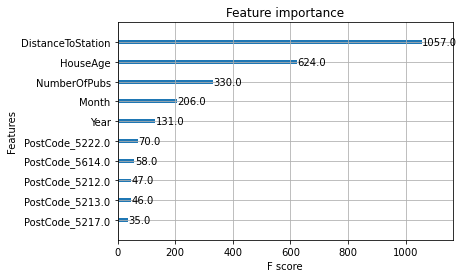

In [90]:
from xgboost import plot_importance
plt.figure(figsize = (20,5))
xgboost_step = fit_models['xg'].best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

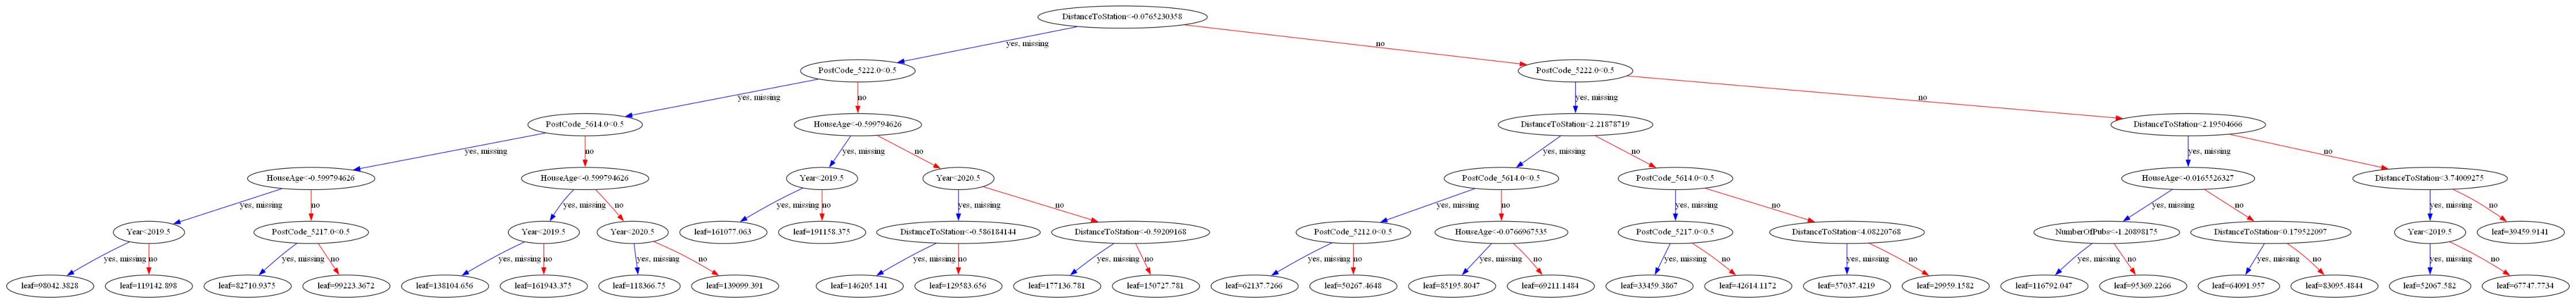

In [91]:
rcParams['figure.figsize'] = 80,100
xgb.plot_tree(fit_models['xg'].best_estimator_[1])
plt.show()

## 7. Save Model

In [92]:
import dill

In [93]:
model = fit_models['gb']

In [94]:
#save model using dill
with open('gb.pkl','wb') as f:
    dill.dump(model,f)

In [95]:
with open('gb.pkl', 'rb') as f:
    reloaded_model = dill.load(f)


In [96]:
X_test.loc[0].to_json()

'{"TransactionDate":"2020.12","HouseAge":17.0,"DistanceToStation":467.6447748,"NumberOfPubs":4.0,"PostCode":"5222.0"}'